In [2]:
!pip install seaborn

    100% |████████████████████████████████| 163kB 89kB/s 
  Running setup.py bdist_wheel for seaborn ... - done
  Stored in directory: /home/osboxes/.cache/pip/wheels/cb/c8/67/83d615c0ef9b529558525aa521025b183de8c5b156799b091e
Successfully built seaborn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

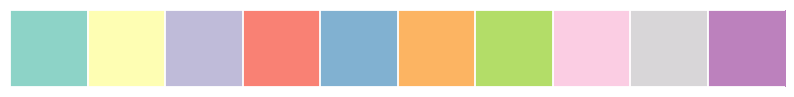

In [11]:
sns.set_palette('Set3', 10)
sns.palplot(sns.color_palette())
sns.set_context('talk')

In [12]:
raw_data = pd.read_csv('ign.csv')
raw_data.head()

Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  
0  Platformer              Y          2012              9           12  
1  Platformer              Y          2012              9           12  
2      Puzzle              N          2012              9           12  
3      Sports              N          2012              9           11  
4      Sports              N          2012              9           11

In [13]:
release_date = raw_data.apply(lambda x: pd.datetime.strptime("{0} {1} {2} 00:00:00".format(
            x['release_year'],x['release_month'], x['release_day']), "%Y %m %d %H:%M:%S"),axis=1)
raw_data['release_date'] = release_date
raw_data.head()


Unnamed: 0 score_phrase                                              title  \
0           0      Amazing                            LittleBigPlanet PS Vita   
1           1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2           2        Great                               Splice: Tree of Life   
3           3        Great                                             NHL 13   
4           4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  \
0  Platformer              Y          2012              9           12   
1  Platformer              Y          2012              9           12   
2      Puzzle              N          2012              9           12   
3      Sports              N          2012              9           11   
4      Sports              N          2012              9           11   

  release_date  
0   2012-09-12  
1   2012-09-12  
2   2012-09-12  
3   2012-09-11  
4   2012-09-11

In [17]:
data = raw_data[raw_data.release_year > 1970]
data["score_phrase"].unique(), data.score_phrase.unique(),data.score.unique()


(array(['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad',
        'Painful', 'Unbearable', 'Disaster', 'Masterpiece'], dtype=object),
 array(['Amazing', 'Great', 'Good', 'Awful', 'Okay', 'Mediocre', 'Bad',
        'Painful', 'Unbearable', 'Disaster', 'Masterpiece'], dtype=object),
 array([  9. ,   8.5,   7. ,   3. ,   7.5,   6.5,   8. ,   5.5,   8.7,
          4.9,   9.6,   7.3,   9.2,   7.9,   6.9,   9.1,   9.5,   6. ,
          2.5,   8.2,   8.8,   4. ,   3.9,   7.1,   5.8,   7.2,   8.3,
          7.6,   9.3,   6.8,   2.3,   4.5,   5. ,   7.4,   6.6,   6.7,
          6.2,   5.3,   9.8,   9.4,   7.8,   8.4,   5.2,   4.7,   6.3,
          7.7,   6.4,   4.1,   8.6,   8.1,   5.6,   8.9,   4.2,   3.8,
          5.9,   2. ,   1. ,   9.7,   5.4,   4.3,   3.7,   3.5,   2.9,
          3.2,   5.7,   0.7,   6.1,   1.8,   4.6,   2.8,   4.8,  10. ,
          5.1,   4.4,   3.6,   1.5,   3.4,   2.7,   3.3,   2.2,   2.1,
          2.6,   1.9,   3.1,   1.3,   9.9,   2.4,   1.2,   1.1,  

# Chargement IGN dans MongoDB + Ajout release_date

In [5]:
# Import pandas, datetime
import numpy as np
import pandas as pd
import datetime

# Chargement ign.csv
raw_data = pd.read_csv('ign.csv',index_col=0)

# Ajout de release_date en concatenant les 3 colonnes release_:year, month, day
release_date = raw_data.apply(lambda x: pd.datetime.strptime("{0} {1} {2} 00:00:00".format(
            x['release_year'],x['release_month'], x['release_day']), "%Y %m %d %H:%M:%S"),axis=1)
raw_data['release_date'] = release_date
raw_data.head()

score_phrase                                              title  \
0      Amazing                            LittleBigPlanet PS Vita   
1      Amazing  LittleBigPlanet PS Vita -- Marvel Super Hero E...   
2        Great                               Splice: Tree of Life   
3        Great                                             NHL 13   
4        Great                                             NHL 13   

                                                 url          platform  score  \
0             /games/littlebigplanet-vita/vita-98907  PlayStation Vita    9.0   
1  /games/littlebigplanet-ps-vita-marvel-super-he...  PlayStation Vita    9.0   
2                          /games/splice/ipad-141070              iPad    8.5   
3                      /games/nhl-13/xbox-360-128182          Xbox 360    8.5   
4                           /games/nhl-13/ps3-128181     PlayStation 3    8.5   

        genre editors_choice  release_year  release_month  release_day  \
0  Platformer              Y          2012              9           12   
1  Platformer              Y          2012              9           12   
2      Puzzle              N          2012              9           12   
3      Sports              N          2012              9           11   
4      Sports              N          2012              9           11   

  release_date  
0   2012-09-12  
1   2012-09-12  
2   2012-09-12  
3   2012-09-11  
4   2012-09-11

In [7]:
raw_data.tail()

score_phrase                                    title  \
18620         Good                Tokyo Mirage Sessions #FE   
18621      Amazing        LEGO Star Wars: The Force Awakens   
18622     Mediocre  Star Ocean: Integrity and Faithlessness   
18623  Masterpiece                                   Inside   
18624  Masterpiece                                   Inside   

                                                     url       platform  \
18620  /games/fire-emblem-x-shin-megami-tensei/wii-u-...          Wii U   
18621  /games/lego-star-wars-the-force-awakens/ps4-20...  PlayStation 4   
18622                   /games/star-ocean-5/ps4-20035681  PlayStation 4   
18623             /games/inside-playdead/xbox-one-121435       Xbox One   
18624                 /games/inside-playdead/pc-20055740             PC   

       score              genre editors_choice  release_year  release_month  \
18620    7.6                RPG              N          2016              6   
18621    9.0  Action, Adventure              Y          2016              6   
18622    5.8                RPG              N          2016              6   
18623   10.0          Adventure              Y          2016              6   
18624   10.0          Adventure              Y          2016              6   

       release_day release_date  
18620           29   2016-06-29  
18621           29   2016-06-29  
18622           28   2016-06-28  
18623           28   2016-06-28  
18624           28   2016-06-28

In [12]:
  ## On charge la classe MyMongo
#execfile("/CheminVersMyMongo/MyMongo.py")
execfile("MyMongo_for_GT.py")

uri= "mongodb://84.39.39.108:27017" # URI de la base mongo
#uri= "mongodb://localhost:27017" # URI de la base mongo

myMongo = MongoManagement() # Creation de l'objet myMongo -->Appel aux fonctions de la classe : myMongo.fonction()
MongoClient = myMongo.MongoConnect(uri)

#dataName='video_game_1'    ## Nom de la base
dataName='test_db'
#collName='IGN_game_new'  ## Nom de la collection
collName='IGN_game_new1'  ## Nom de la collection

#clefDoublon1 = ['Year','Pos']  ## liste des clés à filtrer
#clefDoublon = ['title','url','platform']  ## liste des clés à filtrer
clefDoublon = ['title','url','platform','genre']  ## liste des clés à filtrer

# Connexion à la base
#csH1 = myMongo.MongoConnectDBColl(MongoClient, dataName, collName1)
csH = myMongo.MongoConnectDBColl(MongoClient, dataName, collName)

# Insert de plusieurs elements
#myMongo.bulkUpsert(collection, clefDoublon, listeDictionnaires)
## Attention : tend à planter pour les listes trop longues (>100 000 éléments). Preferez une boucle de oneUpsert()

## Pour pousser un dataFrame DF, on peut le transformer directement en liste de dictionnaire et utiliser bulkUpsert:
myMongo.bulkUpsert(csH, clefDoublon, raw_data.T.to_dict().values()) 

ok


# Suite analyse de IGN

In [11]:
len(raw_data)

18625